## Metehan Gelgi

### Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial as spa

from scipy.stats import multivariate_normal 
from numpy.linalg import eig # to create eigen vectors 
from numpy.linalg import matrix_power

### Part 1

In [2]:
#read the data
X = np.genfromtxt("hw08_data_set.csv", delimiter = ",")
N = np.shape(X)[0]

### Part 2

In [3]:
def Euc_Distance(point1, point2):
    return np.sqrt(np.sum(np.square(point1 - point2)))

In [4]:
B = np.zeros((N,N))
delta = 1.25

In [5]:
# construct B matrix 
for i in range(N):
    for j in range(i+1,N):
        if Euc_Distance(X[i], X[j]) < delta:
            B[i][j] = 1
            B[j][i] = 1

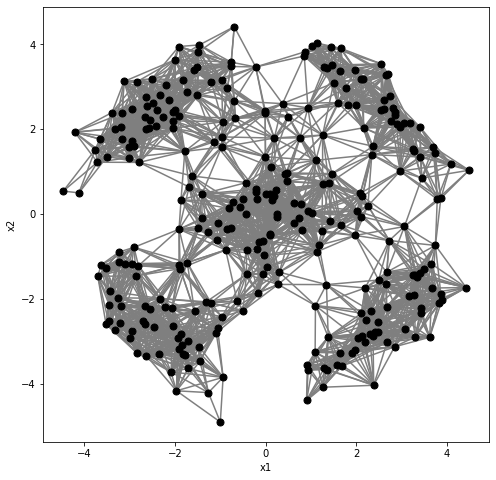

In [6]:
plt.figure(figsize = (8,8))

for a in range(N):
    for b in range(a+1,N):
        
        if B[a][b] == 1:
            x1 = [X[a,0], X[b,0]]
            x2 = [X[a,1], X[b,1] ]
            plt.plot(x1,x2, color ="#7f7f7f")
            
plt.xlabel("x1")
plt.ylabel("x2")
plt.plot(X[:, 0], X[:, 1],"k.", markersize = 14)   
plt.show()

### Part 3

In [7]:
#calculate 𝐃 and 𝐋 matrices
D = np.zeros((N,N))

for i in range(N):
    D[i,i] = B.sum(axis=1)[i]

In [8]:
D_invSqrt = np.sqrt(matrix_power(D,-1))
I = np.identity(N)

L = I - np.matmul(D_invSqrt, np.matmul(B,D_invSqrt))

In [9]:
print(D)

[[20.  0.  0. ...  0.  0.  0.]
 [ 0. 10.  0. ...  0.  0.  0.]
 [ 0.  0. 24. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 21.  0.  0.]
 [ 0.  0.  0. ...  0. 33.  0.]
 [ 0.  0.  0. ...  0.  0. 14.]]


In [10]:
print(L)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


### Part 4

In [11]:
R = 5
eigenValues , eigenVectors = eig(L)
Z = eigenVectors[:,np.argsort(eigenValues)[1:R+1]]
print(Z)

[[ 0.00225332  0.02970626 -0.1215077  -0.05350856 -0.05881185]
 [ 0.01934478  0.01583822 -0.0602155  -0.02464899  0.12571926]
 [ 0.00694396  0.02992297 -0.12951246 -0.05271498  0.05379749]
 ...
 [ 0.00067333  0.00106953 -0.03446799  0.06659001  0.03322699]
 [-0.01344962 -0.01237144 -0.01390019  0.11784073 -0.01399391]
 [-0.025202    0.03167207 -0.00258001  0.00728212 -0.03877666]]


### Part 5 

In [12]:
centroids = None
memberships = None

In [13]:
centroids = Z[[28, 142, 203, 270, 276],:]
print(centroids)

[[ 0.00325886  0.03070096 -0.12747516 -0.05551091 -0.03543487]
 [-0.0342538  -0.11685073  0.02269928 -0.06127445  0.00404365]
 [-0.01188869 -0.03876559  0.00024575  0.04717368 -0.01128642]
 [-0.01512635 -0.03295704 -0.00463725  0.08546651 -0.01848106]
 [ 0.00092625 -0.02155608 -0.00332934  0.07374296 -0.01282762]]


In [14]:
# taken from lab11 code 
def update_centroids(memberships, X):
    # update centroids
    centroids = np.vstack([np.mean(X[memberships == k,:], axis = 0) for k in range(K)])
    return(centroids)

def update_memberships(centroids, X):
    # calculate distances between centroids and data points
    D = spa.distance_matrix(centroids, X)
    # find the nearest centroid for each data point
    memberships = np.argmin(D, axis = 0)
    return(memberships)

In [15]:
memberships = update_memberships(centroids, Z)
iteration = 1
K = 5

In [16]:
# taken from lab11 code 
while True:
    old_centroids = centroids
    centroids = update_centroids(memberships, Z)
    if np.alltrue(centroids == old_centroids):
        break

    old_memberships = memberships
    memberships = update_memberships(centroids, Z)
    if np.alltrue(memberships == old_memberships):
        break

    iteration = iteration + 1


centroids = update_centroids(memberships, X)

### Part 6

### Visualization

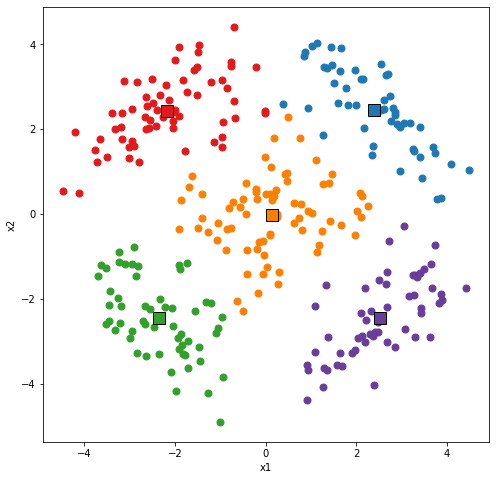

In [17]:
colors = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a", "#b15928"]

plt.figure(figsize=(8, 8))

for c in range(K):
        plt.plot(X[memberships == c, 0], X[memberships == c, 1], ".", markersize = 14,
                     color = colors[c])
for c in range(K):
    plt.plot(centroids[c, 0], centroids[c, 1], "s", markersize = 12, 
                markerfacecolor = colors[c], markeredgecolor = "black")

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()